# HW 10--Kirk Long
### Exercise 1
I've generated an outline for what I will need to accomplish as follows:

1. Create a program capable of calculating the force on the rocket from Earth and from the Moon at any position in space. Adding those together will yield the resultant force that will cause the rocket to shift direction. To do this I'll modify the program for exercise 2 below by making the system Earth-centric, then calculating the orbit of the moon (analagous to how the orbit of Earth was calculated). Then I'll add in a parameter that represents the rocket, adding a third term (instead of the two in the exercise below). 

2. I'll create a model that will represent the rocket's physical parameters (ie how much fuel it has, the thrust yielded by the burning of said fuel and the change in velocity that creates, the approximate weight of the rocket, etc). I'll look at NASA/Wikipedia information to approximate the Saturn V parameters. Relevant here are Newton's second and third laws, where the acceleration the rocket experiences will be equal to $\frac{fuel_{rocket}}{mass_{rocket}}=a_{rocket}$ and the change in position will be given by the second derivative of a. This is of course slightly more complicated than just this, however, as the rocket's mass changes as it burns fuel, meaning I will have to update the mass of the rocket parameter at each new step as well as finding it's change in position, acceleration, and velocity.

3. I'll try to recreate the path Apollo 11 actually took to the moon in steps, with fuel being burned between each step (and thus changing the "initial" conditions for the problem). 
    i. getting into orbit
    ii. burning out to the moon
    iii. entering lunar orbit
    iv. landing on the moon (might omit if this turns out to be super hard)
    v. returning to Earth
    
These calculations are very numerically intensive, and would be impossible to do by hand. Although there is an analytical solution to a two-body problem, even that would be very laborious to compute the position step by step by hand for a large number of steps. 
In the case of this system there are three bodies, and although the rocket does not really act gravitationally on the other two its motion is still only capable of being solved numerically. In addition, there are lots of places where the rocket changes it's velocity vector by burning fuel, resulting in the conditions for the problem changing at various steps and making it even more complicated.Fortunately with modern computing we can automate these routines for very small step sizes and thus obtain arbitrary precision (which is important to keeping astronauts alive). I am grateful for exercise 2 this week because it has already allowed me to get a jump start on this project!

**References:**
1. This class (and your lecture notes)
2. Classical Mechanics by John R. Taylor
3. Computational Physics by Mark Newman (specifically chapter 8)
4. The Wiki for the Saturn V has pretty much all the constants I'll need for the rocket itself, as well as how the engines performed in atmosphere and in space, and looks to have reputable NASA sources. https://en.wikipedia.org/wiki/Saturn_V

### Exercise 2

Given two second order differential equations:

$\frac{d^2x}{dt^2}=-GM\frac{x}{r^3}$

$\frac{d^2y}{dt^2}=-GM\frac{y}{r^3}$

We can transform them into four first order equations by making the substitutions $A=\frac{dx}{dt}$ and $B=\frac{dy}{dt}$

Then our equations become:

$\frac{dx}{dt}=A$

$\frac{dy}{dt}=B$

$\frac{dA}{dt}=-GM\frac{x}{r^3}$

$\frac{dB}{dt}=-GM\frac{y}{r^3}$

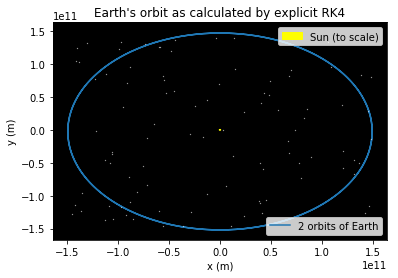

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.constants import gravitational_constant
import random

def dR(r,t):
    G=gravitational_constant
    M=1.9891e30 #kg
    constant=G*M
    rMag=np.sqrt(r[0]**2+r[1]**2) 

    A=r[2] #dx/dt
    B=r[3] #dy/dt
  
    dA=-(constant/(rMag**3))*r[0] #d^2x/dt^2
    dB=-(constant/(rMag**3))*r[1] #d^2y/dt^2
   
    return np.array([A,B,dA,dB],float)


x0=0.0
y0=1.471e11 #m
vX0=3.0287e4 #m/s
vY0=0.0
r0=np.array([x0,y0,vX0,vY0],float)
start=0
yearSeconds=31536000 
end=yearSeconds*2
numSteps=10000
stepSize=(end-start)/numSteps
t=np.arange(start,end,stepSize)

x=[]
y=[]
r=[]

for i in t:
    x.append(r0[0])
    y.append(r0[1])
    k1=stepSize*dR(r0,t)
    k2=stepSize*dR(r0+0.5*k1,t+0.5*stepSize)
    k3=stepSize*dR(r0+0.5*k2,t+0.5*stepSize)
    k4=stepSize*dR(r0+k3,t+stepSize)
    r0+=(k1+2.0*k2+2.0*k3+k4)/6
    
for i in range(len(x)):
    xi=x[i]
    yi=y[i]
    r.append(np.sqrt(xi**2+yi**2))

    
    
rSun=6.957e8 #m
sun=plt.Circle((0,0),rSun,color='yellow')
fig,ax=plt.subplots() 
ax.add_artist(sun) #adds circle to represent Sun as calculated above
ax.set_facecolor('xkcd:black')
plt.plot(x,y,label="2 orbits of Earth")
legendSun=ax.legend([sun],["Sun (to scale)"], loc="upper right") #required to get both sun and earth orbit labels
ax=plt.gca().add_artist(legendSun) #manually adding first legend
plt.legend(loc="lower right")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Earth's orbit as calculated by explicit RK4")

#adding fake stars
starsX=[]
starsY=[]
for i in range(100):
    num=random.randint(-1.5e11,1.5e11)
    starsX.append(num)
for i in range(100):
    num=random.randint(-1.5e11,1.5e11)
    starsY.append(num)
for i in range(len(starsX)): 
    plt.plot(starsX[i],starsY[i],'w.',markersize=.5)
    
plt.show()


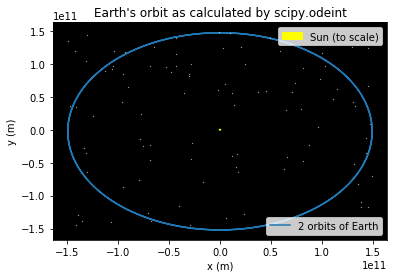

In [2]:
solution=odeint(dR,r0,t)
xSolution=solution[:,0]
ySolution=solution[:,1]
fig,ax=plt.subplots() 
sun=plt.Circle((0,0),rSun,color='yellow')
ax.add_artist(sun) #adds circle to represent Sun as calculated above
ax.set_facecolor('xkcd:black')
plt.plot(xSolution,ySolution,label="2 orbits of Earth")  
legendSun=ax.legend([sun],["Sun (to scale)"], loc="upper right") #required to get both sun and earth orbit labels
ax=plt.gca().add_artist(legendSun) #manually adding first legend
plt.legend(loc="lower right")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Earth's orbit as calculated by scipy.odeint")

#adding fake stars
starsX=[]
starsY=[]
for i in range(100):
    num=random.randint(-1.5e11,1.5e11)
    starsX.append(num)
for i in range(100):
    num=random.randint(-1.5e11,1.5e11)
    starsY.append(num)
for i in range(len(starsX)): 
    plt.plot(starsX[i],starsY[i],'w.',markersize=.5)
    
plt.show()

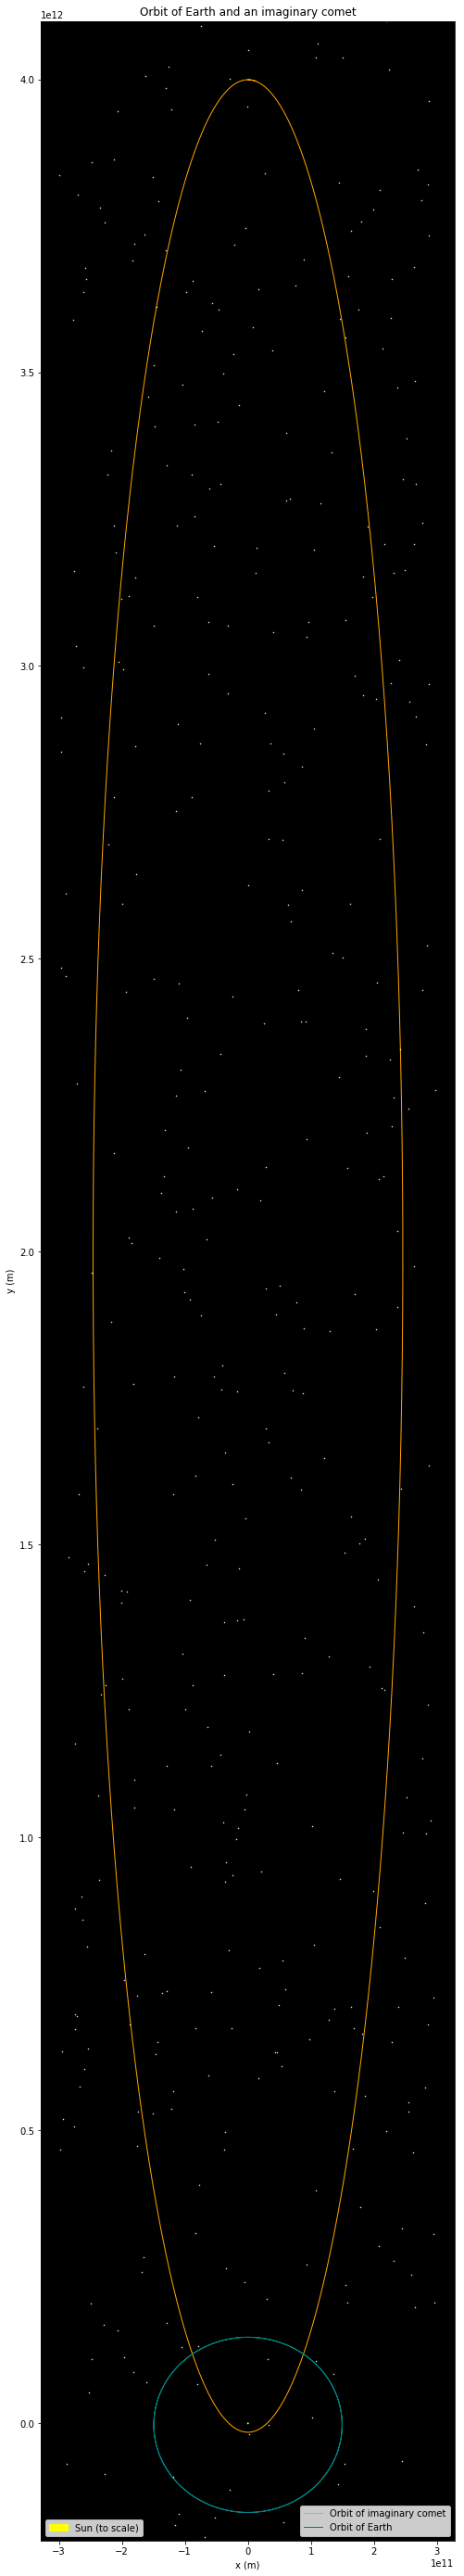

In [16]:
xC0=0.0
yC0=4e12 #m
xV0=500 #m/s
yV0=0.0
rComet=np.array([xC0,yC0,xV0,yV0],float)
start=0
yearSeconds=31536000
end=yearSeconds*50
numSteps=100000
stepSize=(end-start)/numSteps
tComet=np.arange(start,end,stepSize)

solution=odeint(dR,rComet,tComet)
xSolutionComet=solution[:,0]
ySolutionComet=solution[:,1]

fig,ax=plt.subplots(figsize=(8,50))
sun=plt.Circle((0,0),rSun,color='yellow')
ax.add_artist(sun) #adds circle to represent Sun as calculated above
ax.set_facecolor('xkcd:black')
plt.plot(xSolutionComet,ySolutionComet,color="orange",label="Orbit of imaginary comet",linewidth=1)
plt.plot(xSolution,ySolution,color="teal",label="Orbit of Earth",linewidth=1)
    
legendSun=ax.legend([sun],["Sun (to scale)"], loc="lower left") #required to get both sun and orbit labels
ax=plt.gca().add_artist(legendSun) #manually adding first legend
plt.legend(loc="lower right")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Orbit of Earth and an imaginary comet")
plt.ylim(-2e11,4.1e12)

#creating random data points to be stars
starsX=[]
starsY=[]
for i in range(500):
    num=random.randint(-3e11,3e11)
    starsX.append(num)
for i in range(500):
    num=random.randint(-0.5e12,4.5e12)
    starsY.append(num)
    
#adding fake stars
for i in range(len(starsX)): 
    plt.plot(starsX[i],starsY[i],'w.',markersize=1)
plt.show()





### Exercise 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

# import physical constants from SciPy
from scipy.constants import hbar, m_e, e

v0=50*e
a=1e-11
numSteps=1000
start=-5*a
end=5*a
stepSize=(end-start)/numSteps
x=np.arange(start,end,stepSize)


#potential function
def V(x):
    return v0*x**4/a**4

# Schroedinger equation
def f(r,x,E):
    A=r[0]
    B=r[1] 
    dA=B
    dB=(2*m_e/hbar**2)*(V(x)-E)*A
    return np.array([dA,dB],float)

y=[]
def solve(E):
    r=np.array([0.0,1.0],float)
    global y
    y=[]
    for i in x:
        y.append(r[0]) #needed for graphs later
        k1=stepSize*f(r,i,E)
        k2=stepSize*f(r+0.5*k1,i+0.5*stepSize,E)
        k3=stepSize*f(r+0.5*k2,i+0.5*stepSize,E)
        k4=stepSize*f(r+k3,i+stepSize,E)
        r+=(k1+2.0*k2+2.0*k3+k4)/6
    return r[0]

#find 3 roots

def secantRoot(E1,E2):
    target=e/1000
    psi2=solve(E1)
    while abs(E1-E2)>target:
        psi1,psi2=psi2,solve(E2)
        E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)
        E0=E2/e
    return E0

groundState=secantRoot(0,e)
print("Ground state =",groundState,"eV")
groundPsiY=y
excited1=secantRoot(600*e,800*e)
print(excited1)
state1Y=y
excited2=secantRoot(1100*e,1150*e)
print(excited2)
state2Y=y

Ground state = 205.30182768328584 eV
735.6730552230877
1443.5337048887116


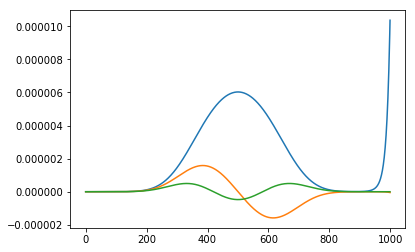

In [7]:
plt.plot(groundPsiY)
plt.plot(state1Y)
plt.plot(state2Y)

plt.show()

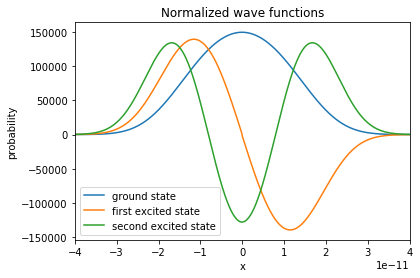

In [6]:
#cut off half of function
groundPsiYHalf=[]
state1YHalf=[]
state2YHalf=[]
for i in range(len(groundPsiY)):
    if i<500:
        groundPsiYHalf.append(groundPsiY[i])
        state1YHalf.append(state1Y[i])
        state2YHalf.append(state2Y[i])

#create corrected functions using symmetry of half function and reflecting across midpoint
groundStateCorrected=groundPsiYHalf
state1Corrected=state1YHalf
state2Corrected=state2YHalf
for i in range(len(groundStateCorrected)):
    groundStateCorrected.append(groundStateCorrected[499-i])
    state2Corrected.append(state2Corrected[499-i])
    state1Corrected.append(-1*(state1Corrected[499-i])) #negative needed for cubic

def normalize(function):
    N=len(function)
    intSimp=0
    #Simpson's rule    
    lowerBound=a*(-10)
    upperBound=a*10
    dX=(upperBound-lowerBound)/float((N-1))
    for i in range(N):
        if i==0 or i==N-1:
            intSimp+=function[i]**2   
        elif i%2==0:
            intSimp+=2*function[i]**2
        else:
            intSimp+=4*function[i]**2  
    intSimp*=dX/3 
    factor=np.sqrt(intSimp)
    for i in range(len(function)):
        function[i]*=(1/factor)
    return function

groundNorm=normalize(groundStateCorrected)
state1Norm=normalize(state1Corrected)
state2Norm=normalize(state2Corrected)
plt.plot(x,groundNorm,label='ground state')
plt.plot(x,state1Norm,label='first excited state')
plt.plot(x,state2Norm,label='second excited state')
plt.xlim(-4e-11,4e-11)
plt.legend()
plt.xlabel("x")
plt.ylabel("probability")
plt.title("Normalized wave functions")
plt.show()